<h2>Lending club case study</h2>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#loading loan file

loan_data = pd.read_csv('/content/loan.csv',index_col=False)

In [ ]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
loan_data.shape

(39717, 111)

In [ ]:
#Finding percentage of null or missing values
null_values_percentage = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

In [ ]:
null_values_percentage[null_values_percentage > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [ ]:
#droping all null values column where percentage is greater than 40%

loan_data.drop(null_values_percentage[ null_values_percentage > 40 ].index,axis=1,inplace=True)

In [ ]:
#drop all columns where number of unique values is only one
for col in loan_data.columns:
    if (loan_data[col].nunique()==1):
        loan_data.drop([col], axis = 1,inplace=True)

In [ ]:
#Finding number of unique values, printing high unique valued columns
loan_data.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
dtype: int64

In [ ]:
#get list of loan statuses
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [ ]:
#delete all rows where loan status is current
loan_data = loan_data[(loan_data.loan_status!="Current")]

In [ ]:
(loan_data.isna().sum()/len(loan_data.index))*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.185033
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.472717
purpose                     0.000000
title                       0.028514
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

In [ ]:
loan_data.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,7,0,4175,51.50%,8,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10,NaN


We are analyzing the user details and the driving factors of loan defaulting before approving loan.
So we can safely remove the columns / variables corresponding to that scenario.
* Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
* The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
* "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
* "out_prncp_inv" , "total_pymnt_inv " are not contributing to the loan defaulting analysis. So removing them.
* "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

In [ ]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","pub_rec_bankruptcies"], axis = 1, inplace = True)

In [ ]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,NaN,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [ ]:
loan_data.shape

(38577, 22)

In [ ]:
(loan_data.isnull().sum()/len(loan_data.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
desc                   32.472717
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
dtype: float64

In [ ]:
#Calculating mode for employee period of work.
print("Mode : " + loan_data.emp_length.mode()[0])

Mode : 10+ years


In [ ]:
#Checking other values counts that are in emp_length
loan_data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [ ]:
#Checking null values counts that are in emp_length
loan_data.emp_length.isnull().sum()

1033

**<h3>From above mode we ca say that mode has more frequent value than other values</h3>**



*   From above observation we can say that we can safely replace null values with mode value
* From above we can see that null value count is so low so replacing with mode value will not affect the analysis.



In [ ]:
#Filling null values with mode value in emp_length column
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0],inplace=True)

In [ ]:
loan_data.emp_length.isnull().sum()

0

In [ ]:
loan_data.revol_util.isnull().sum()

50

In [ ]:
loan_data.dropna(axis=0,subset=['revol_util'],inplace=True)
loan_data.revol_util.isnull().sum()

0

In [ ]:
(loan_data.isnull().sum()/len(loan_data.index))*100

loan_amnt               0.00000
funded_amnt_inv         0.00000
term                    0.00000
int_rate                0.00000
installment             0.00000
grade                   0.00000
sub_grade               0.00000
emp_length              0.00000
home_ownership          0.00000
annual_inc              0.00000
verification_status     0.00000
issue_d                 0.00000
loan_status             0.00000
desc                   32.47333
purpose                 0.00000
dti                     0.00000
earliest_cr_line        0.00000
inq_last_6mths          0.00000
open_acc                0.00000
pub_rec                 0.00000
revol_util              0.00000
total_acc               0.00000
dtype: float64

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  desc                 26016 non-null  object 
 14  purpose              38527 non-null  object 
 15  dti                  38527 non-null 

**int_rate** and **revol_util** are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [ ]:
loan_data['int_rate'] = loan_data.int_rate.str.strip('%').astype(float)
loan_data['revol_util'] = loan_data.revol_util.str.strip('%').astype(float)

In [ ]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [ ]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,NaN,wedding,11.20,Nov-04,3,9,0,28.3,12


In [ ]:
#converting to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

In [ ]:
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [ ]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

**<h2>Derived Variables</h2>**
Let's create new columns from date type columns

In [ ]:
#issue_d column
loan_data['issue_d_year'] = loan_data.issue_d.dt.year
loan_data['issue_d_month'] = loan_data.issue_d.dt.strftime('%b')
loan_data['issue_d_weekday'] = loan_data.issue_d.dt.weekday


In [ ]:
#data type conversion of year and weekday so that they will not considered as numbers
loan_data['issue_d_year'] = loan_data['issue_d_year'].astype(object)
loan_data['issue_d_weekday'] = loan_data['issue_d_weekday'].astype(object)

In [ ]:
loan_data['earliest_cr_line_year'] = loan_data.earliest_cr_line.dt.year
loan_data['earliest_cr_line_month'] = loan_data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line_year'].astype(object)

In [ ]:
#Here we can create another column with funded amount by investor and amount approved
loan_data['loan_approved_ratio'] = round(loan_data.funded_amnt_inv*100/loan_data.loan_amnt,2)

In [ ]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,loan_approved_ratio
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65,1985-01-01,1,3,0,83.7,9,2011,Dec,3,1985,Jan,99.5
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00,1999-04-01,5,3,0,9.4,4,2011,Dec,3,1999,Apr,100.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,NaN,small_business,8.72,2001-11-01,2,2,0,98.5,10,2011,Dec,3,2001,Nov,100.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00,1996-02-01,1,10,0,21.0,37,2011,Dec,3,1996,Feb,100.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,NaN,wedding,11.20,2004-11-01,3,9,0,28.3,12,2011,Dec,3,2004,Nov,100.0


In [ ]:
loan_data.shape

(38527, 28)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38527 non-null  int64         
 1   funded_amnt_inv         38527 non-null  float64       
 2   term                    38527 non-null  object        
 3   int_rate                38527 non-null  float64       
 4   installment             38527 non-null  float64       
 5   grade                   38527 non-null  object        
 6   sub_grade               38527 non-null  object        
 7   emp_length              38527 non-null  int64         
 8   home_ownership          38527 non-null  object        
 9   annual_inc              38527 non-null  float64       
 10  verification_status     38527 non-null  object        
 11  issue_d                 38527 non-null  datetime64[ns]
 12  loan_status             38527 non-null  object

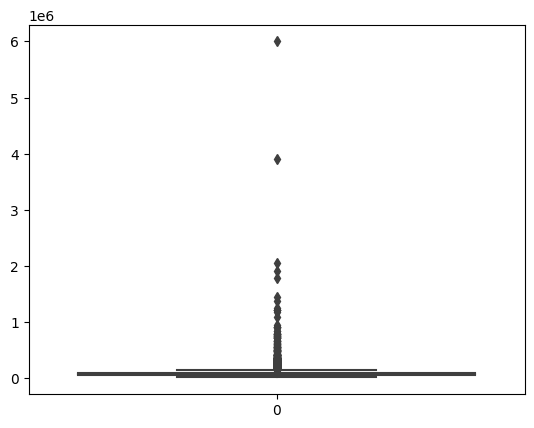

In [ ]:
#Outlier check with boxplot
before = sns.boxplot(loan_data['annual_inc'])

In [ ]:
#From above we can say ther are outlier here so will check quantile for this column.

quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [ ]:
#Quantile o/p is showing us values so according to it we are choosing 95% value and above them we are discarding.
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

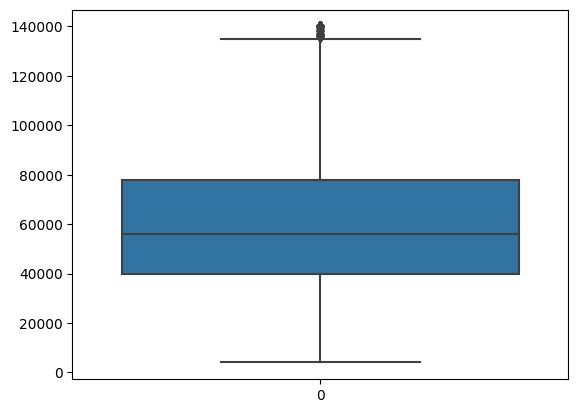

In [ ]:
after = sns.boxplot(loan_data['annual_inc'])

**As above boxplot we done with annual_inc now we will check other numeric values.**

dti<br>
funded_amnt_inv<br>
loan_amnt<br>

<Axes: >

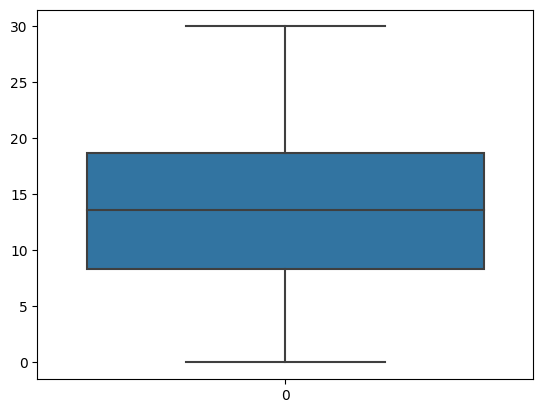

In [ ]:
sns.boxplot(loan_data['dti'])

<Axes: >

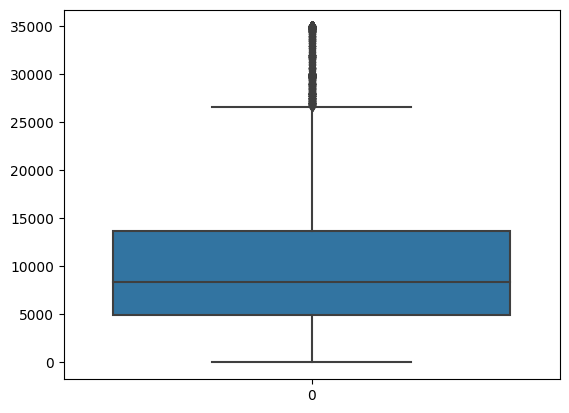

In [ ]:
sns.boxplot(loan_data['funded_amnt_inv'])

In [ ]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])


0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

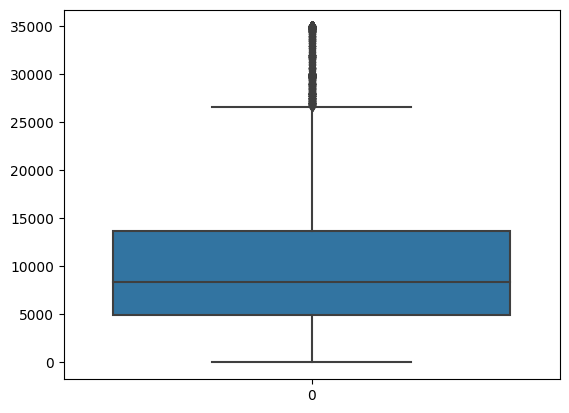

In [ ]:
sns.boxplot(loan_data.funded_amnt_inv)


In [ ]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])


0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

**<h2>Visualizing Categorical Data</h2>**

****

<Axes: xlabel='loan_status', ylabel='count'>

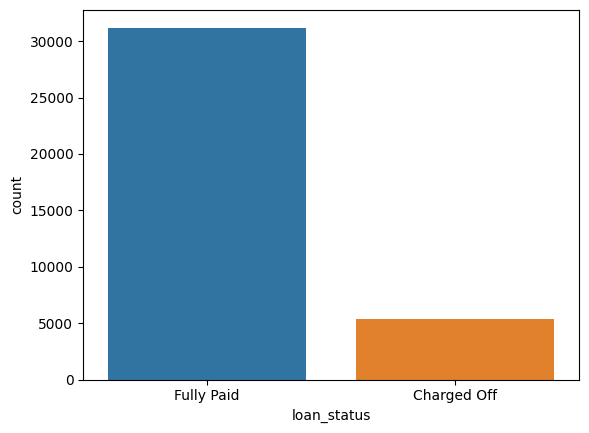

In [ ]:
sns.countplot(x = 'loan_status', data = loan_data)

In [ ]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

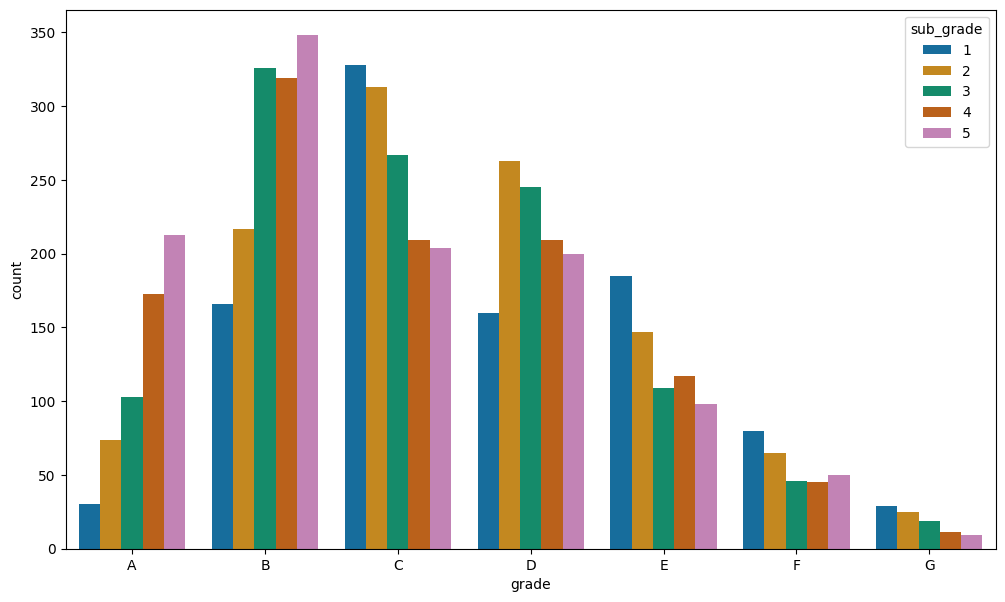

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

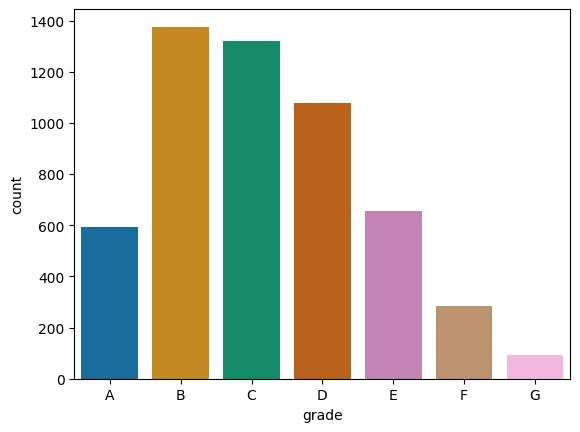

In [ ]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
loan_data[loan_data.home_ownership == 'NONE']

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,loan_approved_ratio
39318,10000,1228.06,36 months,7.75,312.22,A,3,5,NONE,22200.0,Not Verified,2008-01-01,Fully Paid,"I plan to pay off my credit cards, leaving me ...",debt_consolidation,5.24,1994-04-01,0,9,0,8.7,22,2008,Jan,1,1994,Apr,12.28
39659,4000,1925.00,36 months,9.64,128.41,B,4,0,NONE,100000.0,Not Verified,2007-08-01,Fully Paid,I took a high interest loan from Citibank in 2...,other,15.00,1999-05-01,1,6,0,14.9,8,2007,Aug,2,1999,May,48.12
39660,2800,1625.00,36 months,8.70,88.65,B,1,0,NONE,120000.0,Not Verified,2007-08-01,Fully Paid,The family is expanding in October and we are ...,other,15.00,1999-05-01,1,6,0,14.9,8,2007,Aug,2,1999,May,58.04


In [ ]:
#There are 3 values with none so will replace them with other.
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [ ]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

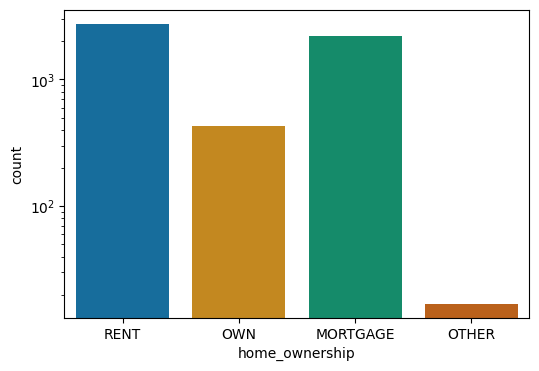

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

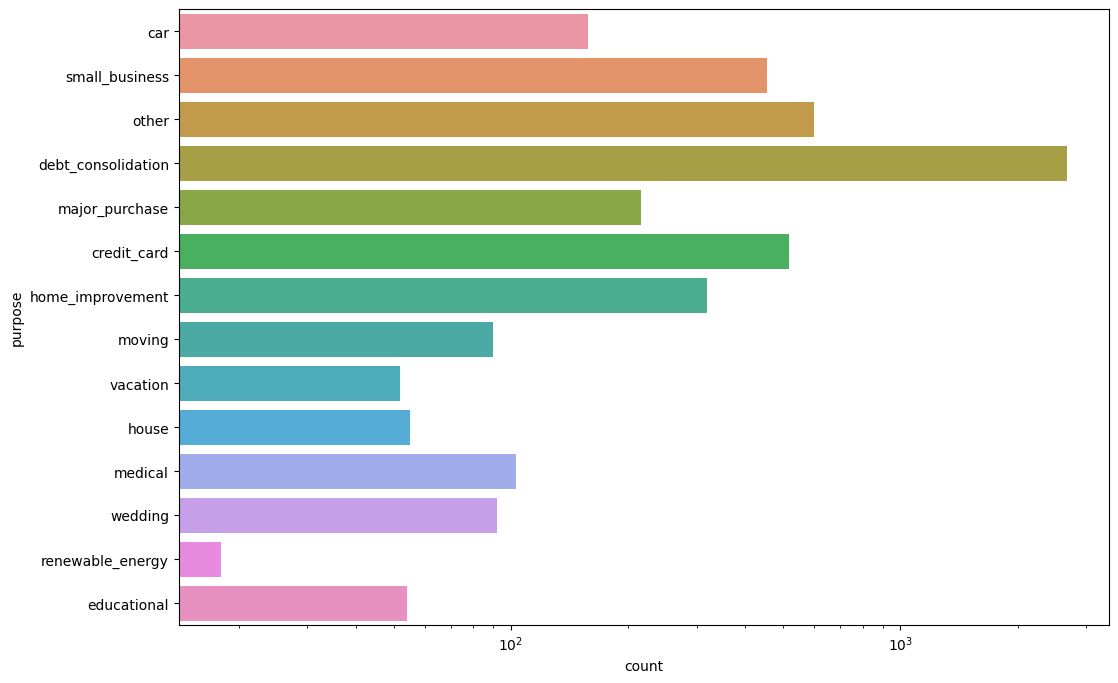

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


In [ ]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<Axes: xlabel='emp_length', ylabel='count'>

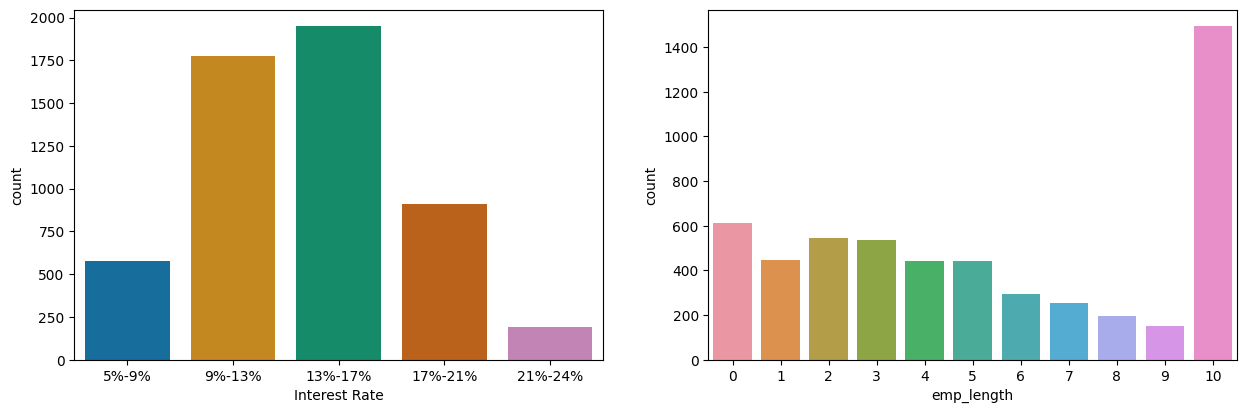

In [ ]:
#Analyzing interest rate wrt the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

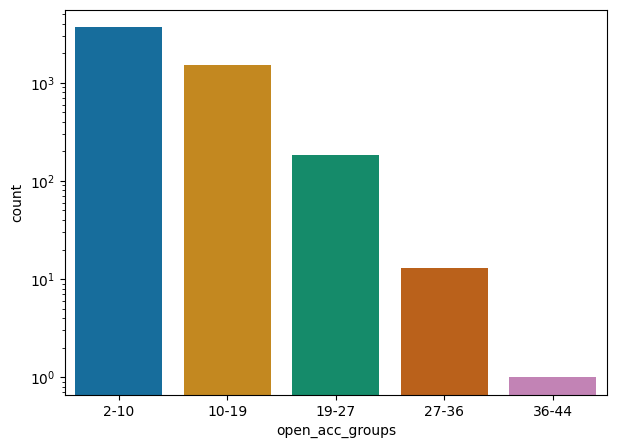

In [ ]:
#Similarly analyzing open_acc,revol_util,total_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

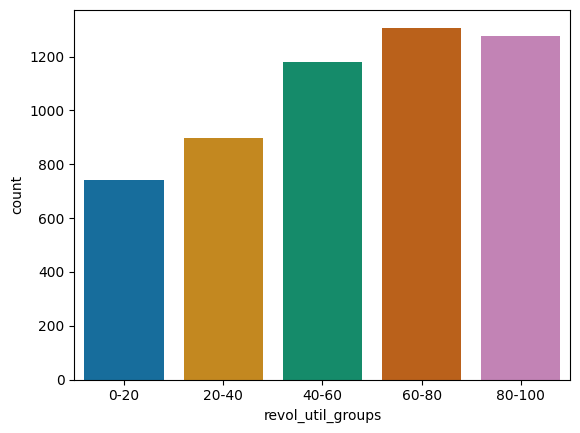

In [ ]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='total_acc_groups', ylabel='count'>

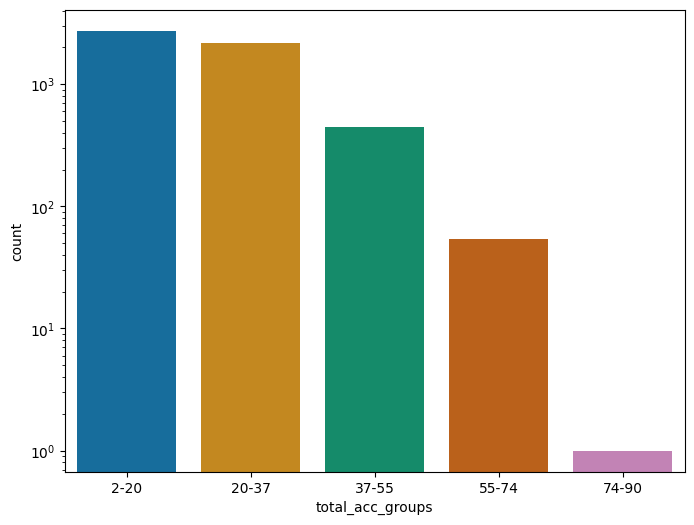

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='annual_inc_groups', ylabel='count'>

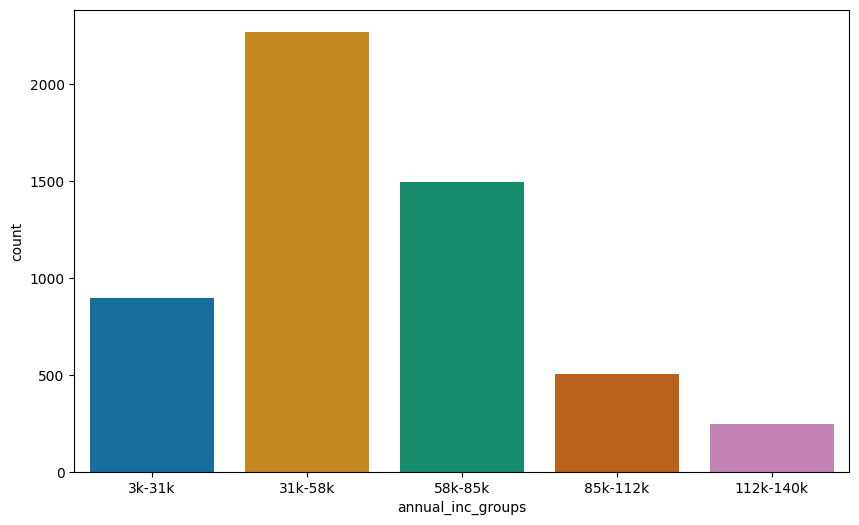

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

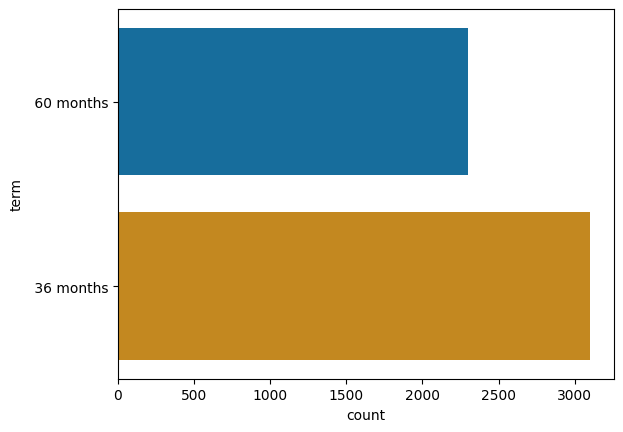

In [ ]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])



<Axes: xlabel='verification_status', ylabel='count'>

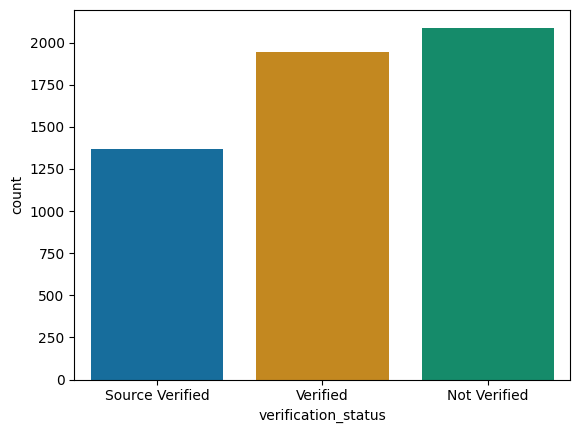

In [ ]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

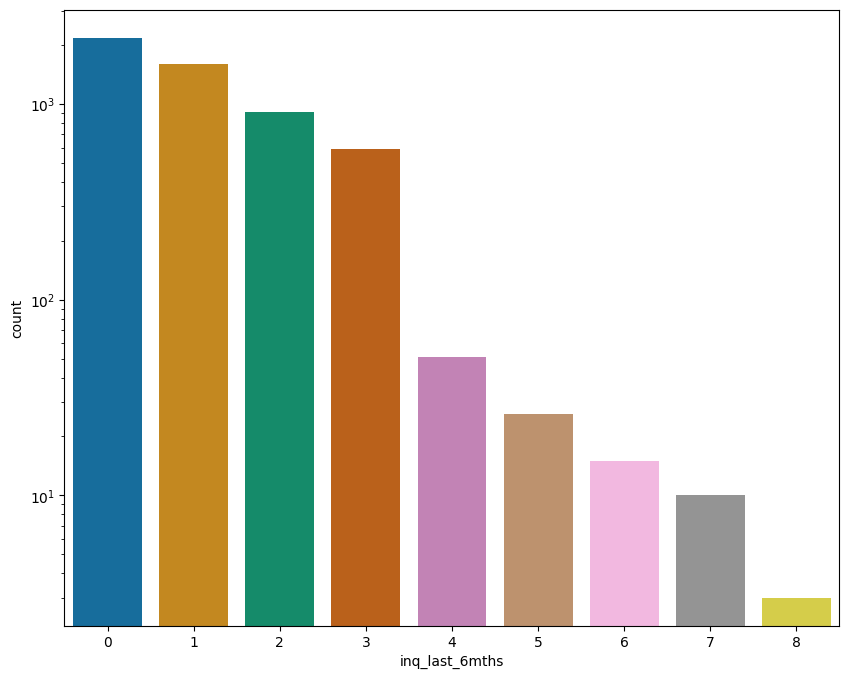

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])


<Axes: xlabel='pub_rec', ylabel='count'>

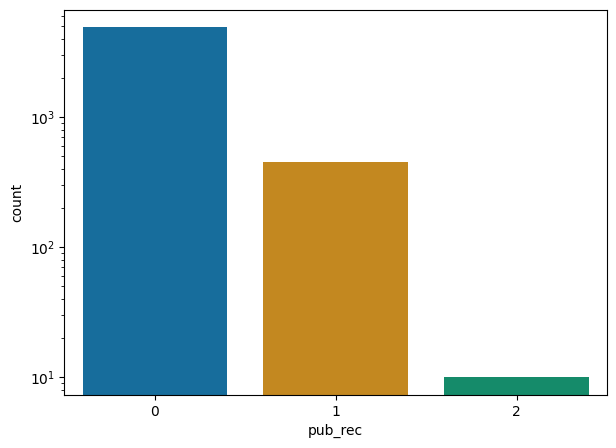

In [ ]:

fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

**<h1>Analyzing by issued month and year</h1>**

<Axes: xlabel='issue_d_year', ylabel='count'>

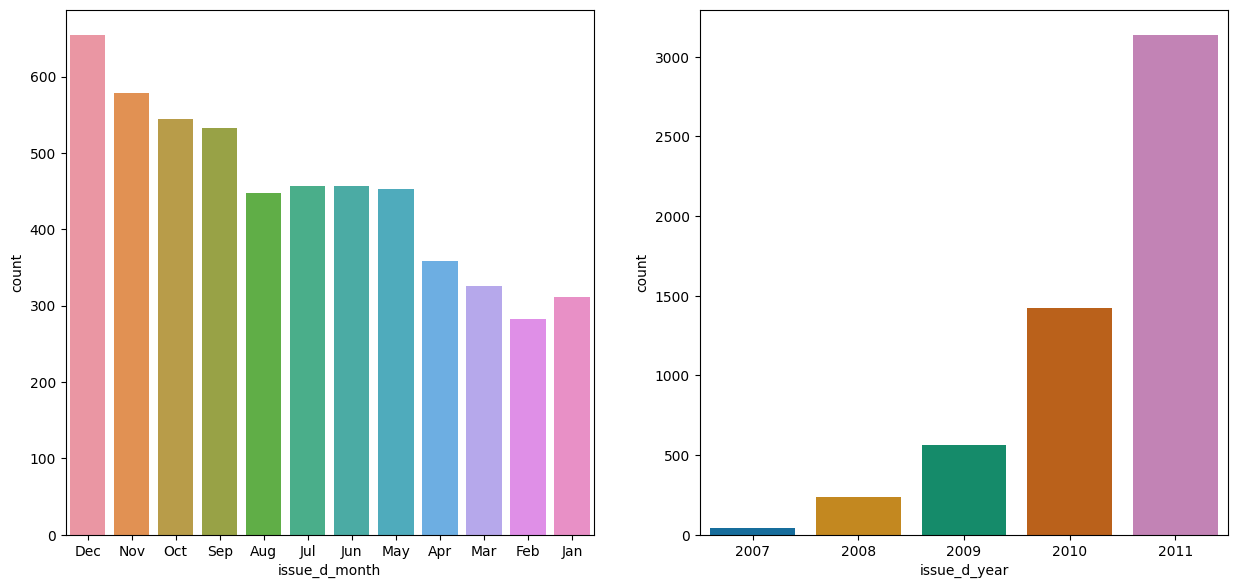

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

In [ ]:
#Analyzing installment,dti, loan_amnt
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

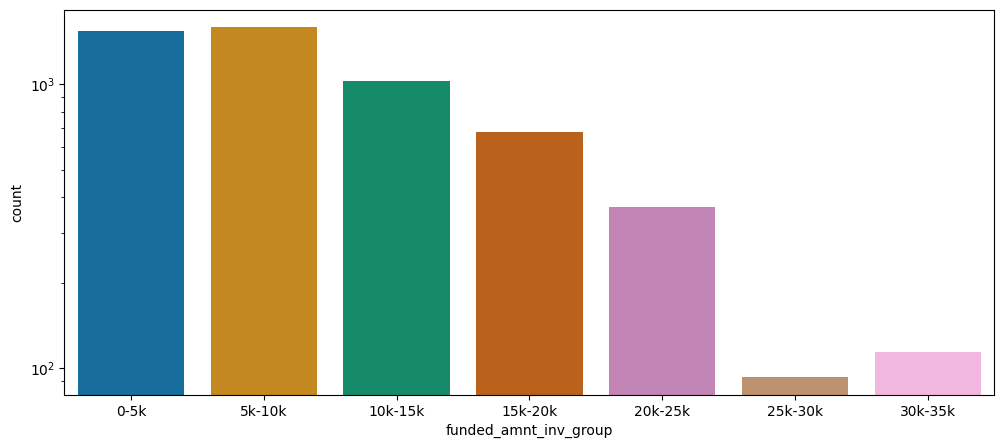

In [ ]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

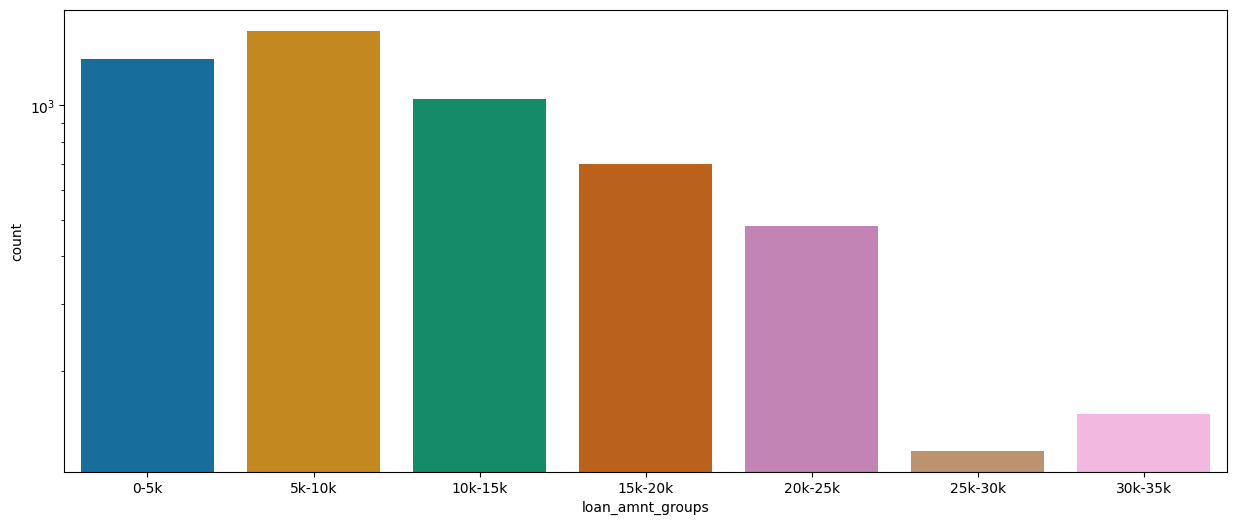

In [ ]:
ig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

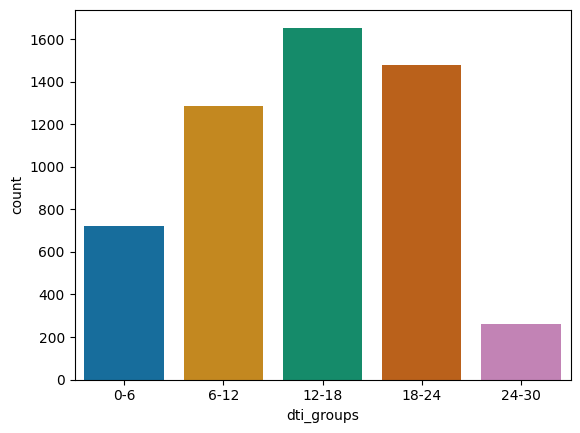

In [ ]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])



<Axes: xlabel='installment_groups', ylabel='count'>

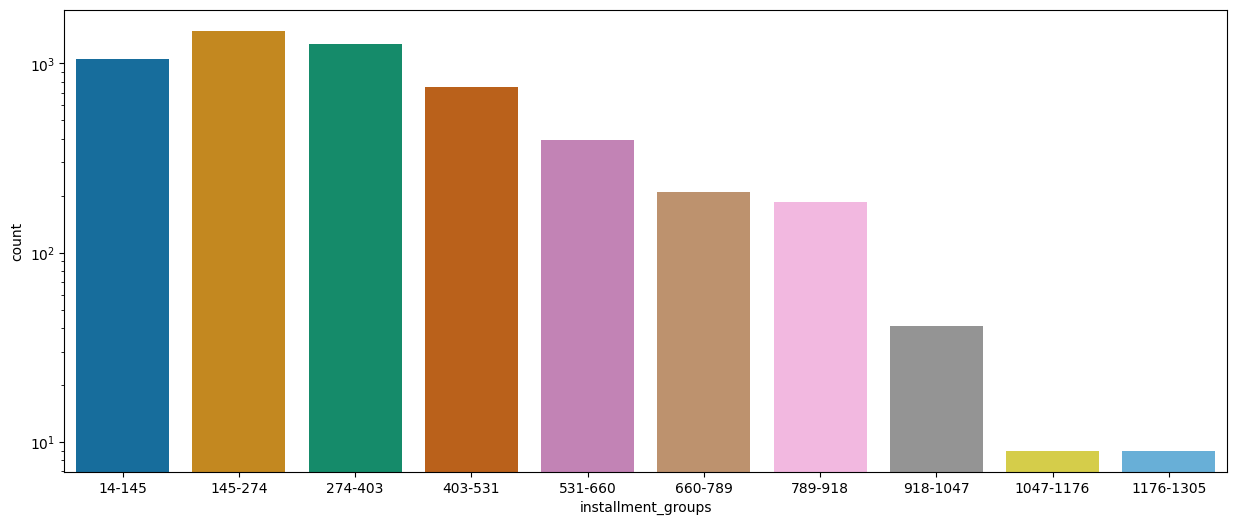

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

**<br><h1>Observations</h1></br>**
**The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :**<br>
* Applicants having house_ownership as 'RENT'
* Applicants who use the loan to clear other debts
* Applicants who receive interest at the rate of 13-17%
* Applicants who have an income of range 31201 - 58402
* Applicants who have 20-37 open_acc
* Applicants with employement length of 10
* When funded amount by investor is between 5000-10000
* Loan amount is between 5429 - 10357
* Dti is between 12-18
* When monthly installments are between 145-274
* Term of 36 months
* When the loan status is Not verified
* When the no of enquiries in last 6 months is 0
* When the number of derogatory public records is 0
* When the purpose is 'debt_consolidation'
* Grade is 'B'
* And a total grade of 'B5' level.<br>

**Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting.**<br>
* The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

**<h2>Analysing annual income with other columns for more insights</h2>**




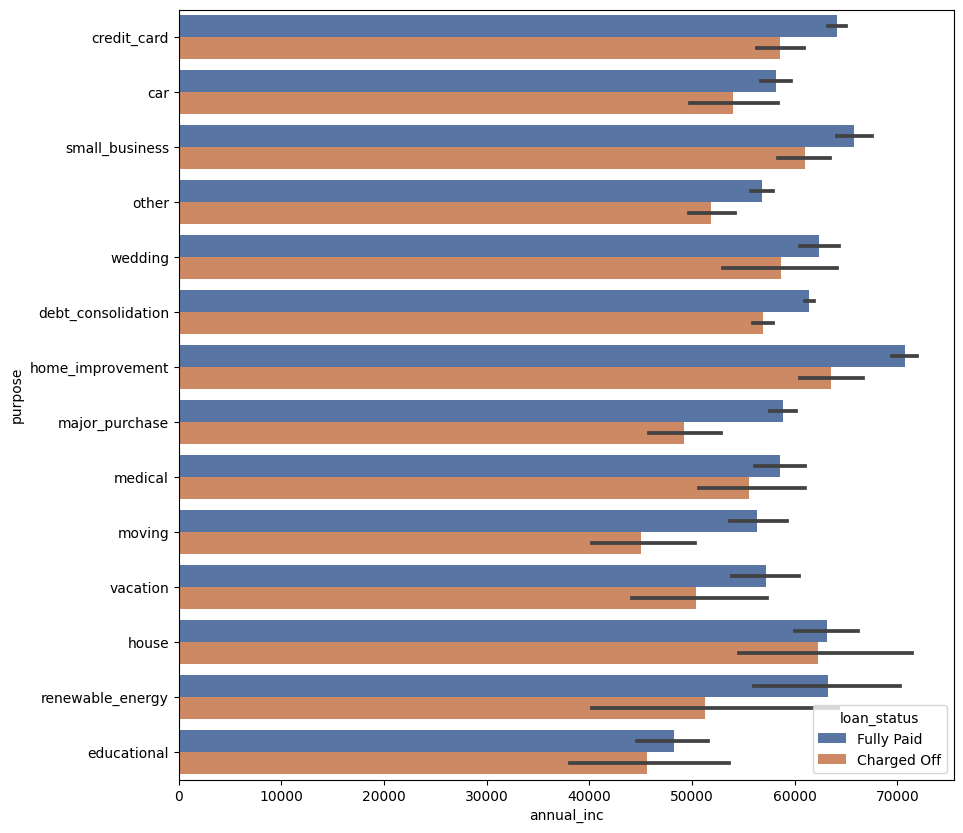

In [ ]:
##1. Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

**Even if number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.**<br>
* Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

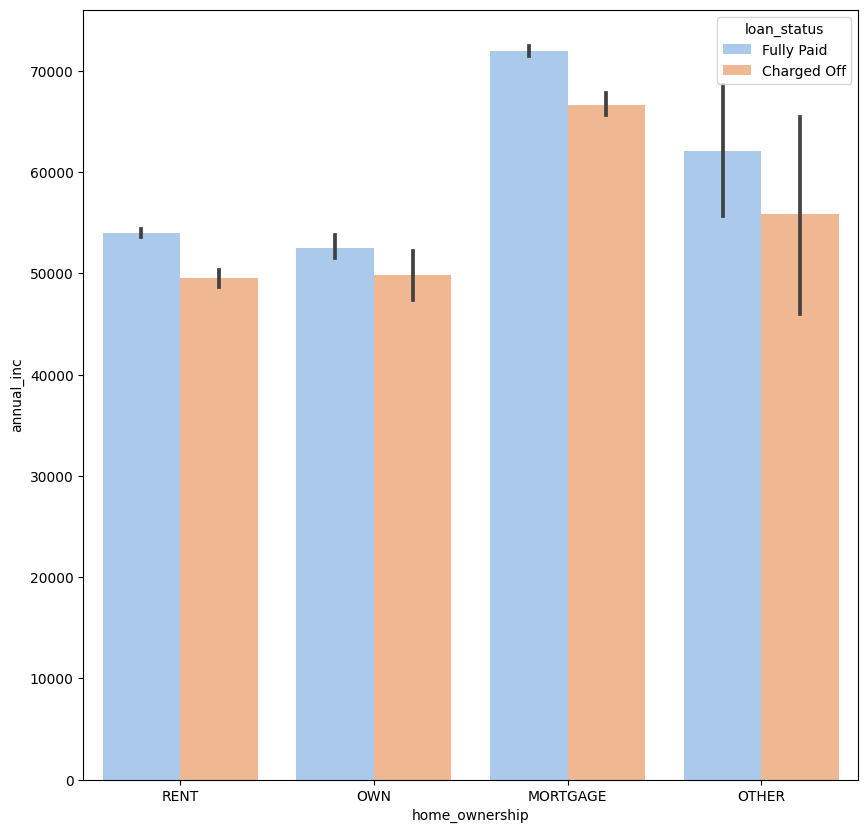

In [ ]:
#2.Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

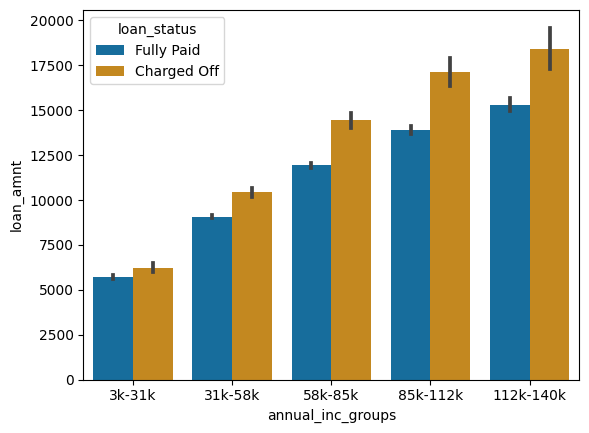

In [ ]:
# 3. Annual Income vs Loan amount
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)


**<h2>Across all the income groups, the loan_amount is higher for people who defaulted.</h2>**

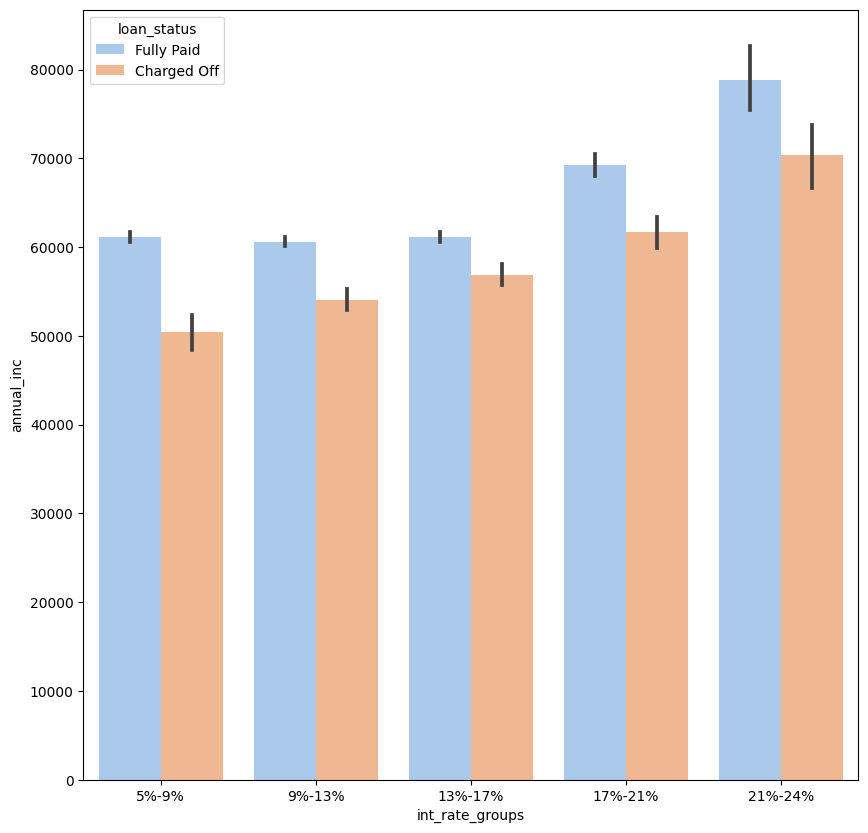

In [ ]:
# 4. Annual income vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

**<h3>Analysing loan_amount with other columns for more insights</h3>**

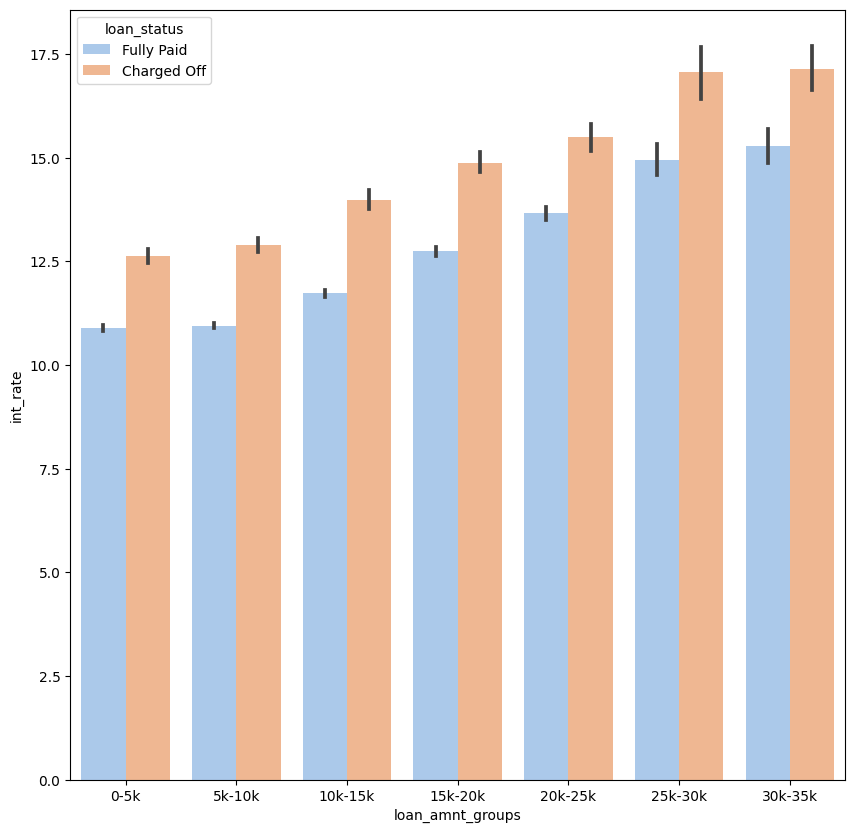

In [ ]:
# 1.Loan Amount vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

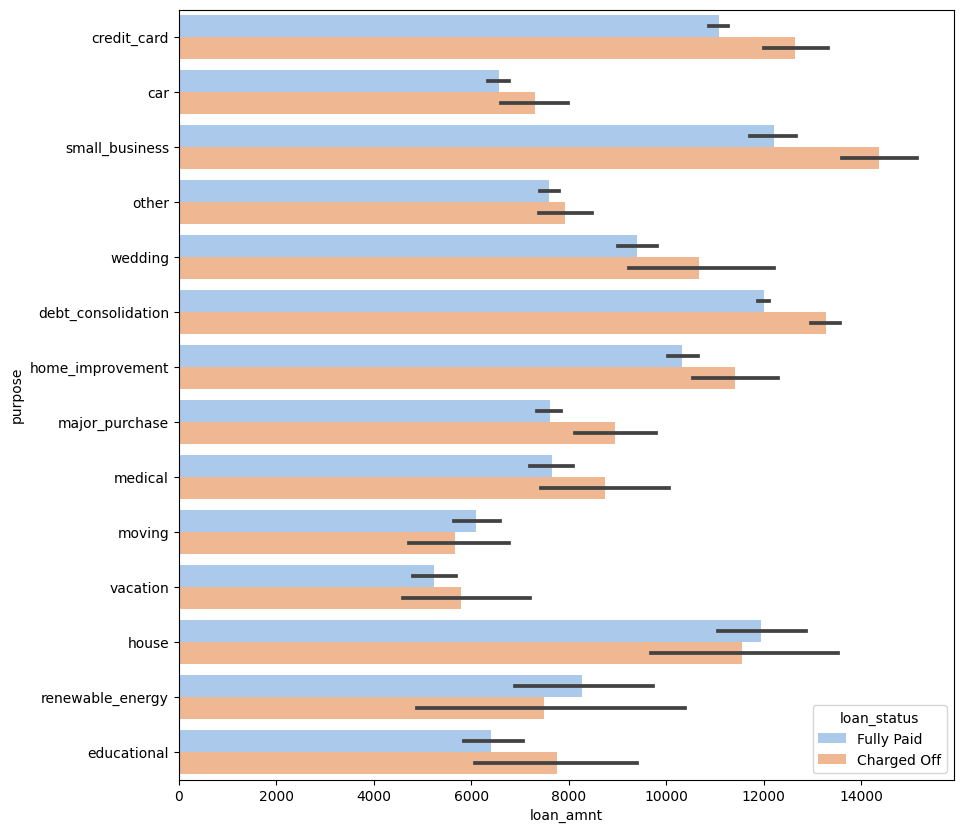

In [ ]:
#2.Loan vs Loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='issue_d_year', ylabel='loan_amnt'>

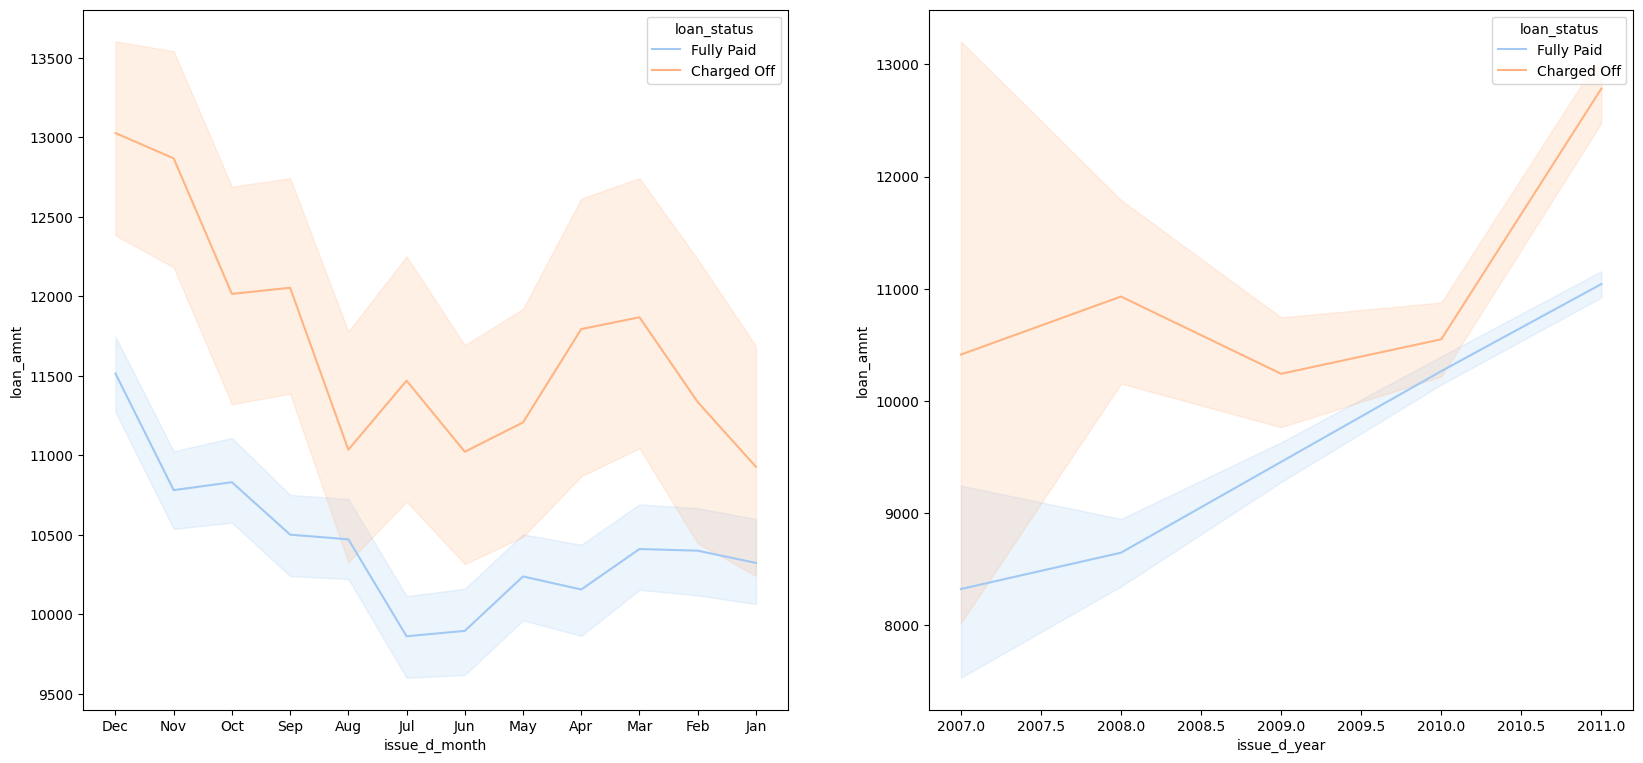

In [ ]:
# 4.Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="pastel")

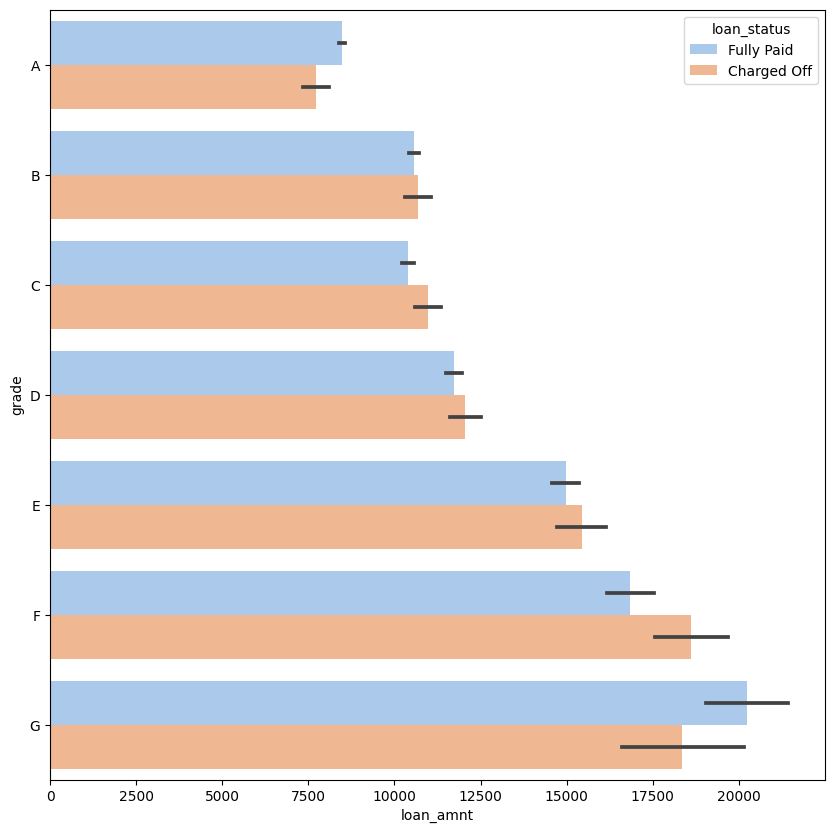

In [ ]:
#5.Loan amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

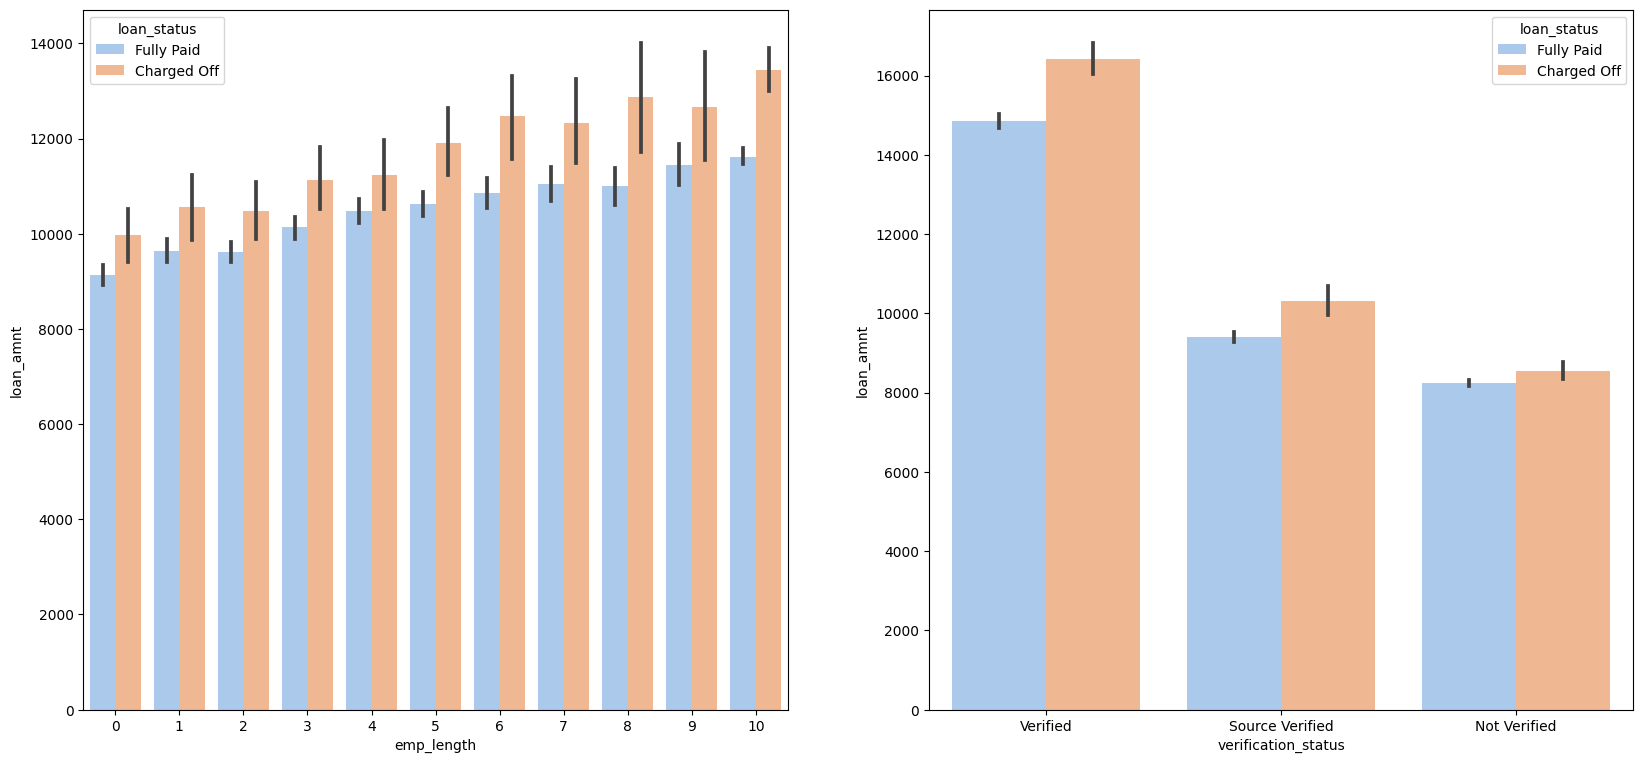

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

**<h3>Employees with longer working history got the loan approved for a higher amount.</h3>**
* Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

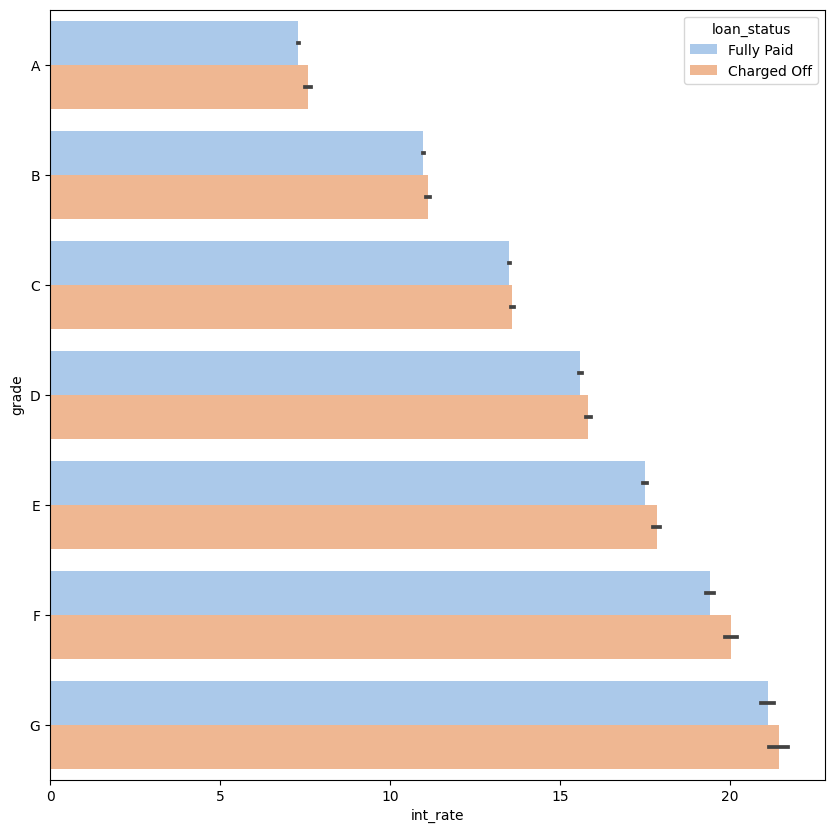

In [ ]:
# grade vs interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

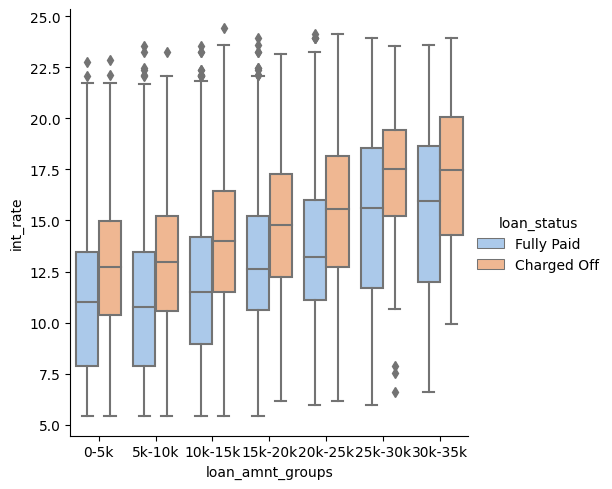

In [ ]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

**<h2>The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.</h2>**
* This can be a pretty strong driving factor for loan defaulting.

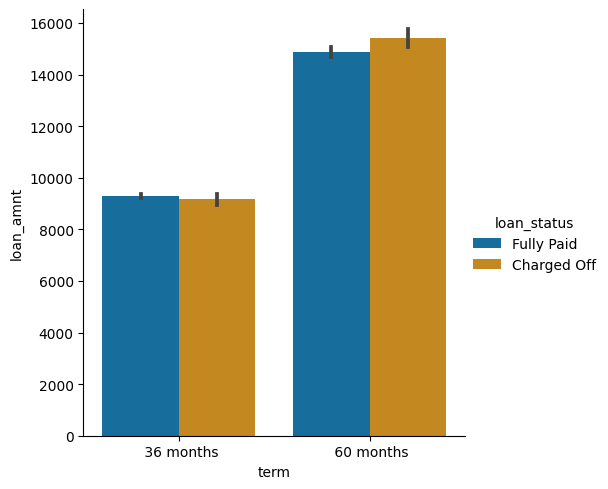

In [ ]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

**<h2>Applicants who applied and defaulted have no significant difference in loan_amounts.</h2>**
* Which means that applicants applying for long term has applied for more loan.

**<h1>Observations<h1>**

**<h3>The above analysis with respect to the charged off loans. There is a more probability of defaulting when :</h3>**
* Applicants taking loan for 'home improvement' and have income of 60k -70k
* Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
* Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
* Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
* Applicants who have taken a loan for small business and the loan amount is greater than 14k
* Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
* When grade is F and loan amount is between 15k-20k
* When employment length is 10yrs and loan amount is 12k-14k
* When the loan is verified and loan amount is above 16k
* For grade G and interest rate above 20%

<Axes: >

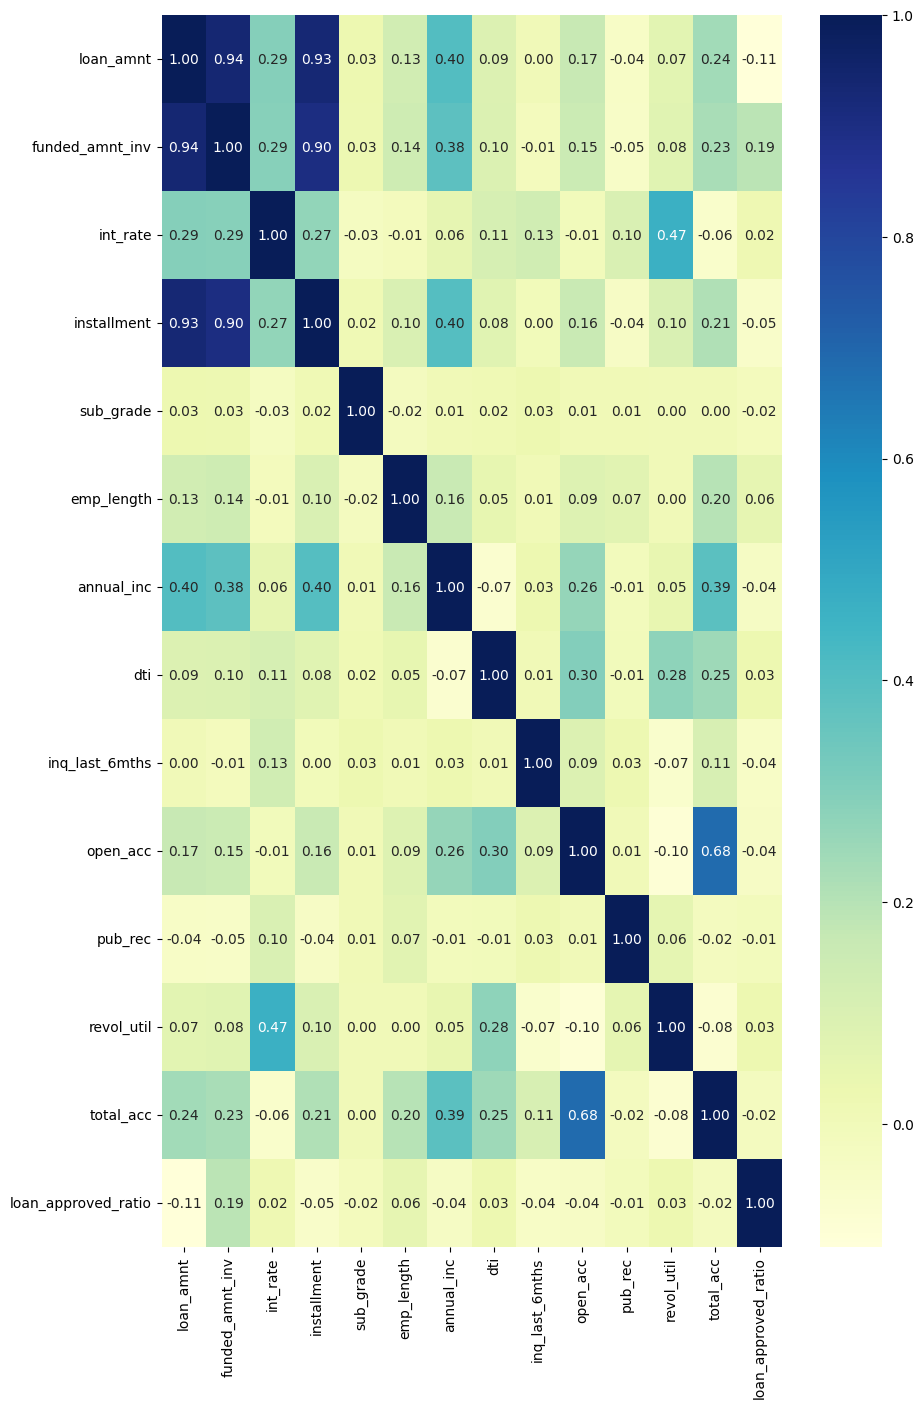

In [ ]:
plt.figure(figsize=(10, 16))
sns.heatmap(loan_data.corr(),annot=True,cmap="YlGnBu",fmt=".2f")